# Лабораторная работа 1
### Выполнил: Затопляев Ростислав Артемович

### EDA (исследовательский анализ данных)

In [1]:
# импорт необходимых библиотек
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
random.seed(42)
np.random.seed(42)

In [4]:
data_train = pd.read_csv('train.csv', index_col=0)
data_test = pd.read_csv('test.csv')

In [5]:
id = data_test.id
data_test.drop('id', axis=1, inplace=True)

**Получим информацию о датасетах**

**Выведем основную информацию о данных**

In [6]:
print("Размер данных:", data_train.shape)
print("\nТипы данных:")
print(data_train.dtypes)
print("\nПервые 5 строк:")
print(data_train.head())
print("\nОсновные статистики:")
print(data_train.describe())

Размер данных: (40453, 12)

Типы данных:
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
theta1       int64
theta2       int64
price        int64
dtype: object

Первые 5 строк:
       carat          cut color clarity  depth  table     x     y     z  \
id                                                                        
17044   0.28        Ideal     F    VVS2   61.6   55.0  4.22  4.26  2.61   
30625   0.28        Ideal     I     VS1   62.5   54.0  4.18  4.23  2.63   
17043   0.28  'Very Good'     F      IF   62.2   55.0  4.23  4.26   NaN   
37947   0.28  'Very Good'     E     VS2   63.0   59.0  4.11  4.15  2.60   
30626   0.28        Ideal     I     VS1   62.4   54.0  4.18  4.19  2.61   

       theta1  theta2  price  
id                            
17044       5       5    612  
30625       5       6    448  
17043       5       7    612  
37947       5      

**Посмотрим на шум с помощью pairplot**

In [7]:
print("Количество дубликатов в data_train = ",data_train.duplicated().sum())
print("Количество дубликатов в data_test = ",data_test.duplicated().sum())

Количество дубликатов в data_train =  0
Количество дубликатов в data_test =  0


**Проверим пропущенные значения**

In [8]:
print("Пропущенные значения:")
print(data_train.isnull().sum())
print(f"Процент пропусков:\n {(data_train.isnull().sum() / len(data_train) * 100).round(2)}")

Пропущенные значения:
carat       0
cut         0
color       0
clarity    64
depth      57
table       0
x          48
y          60
z          42
theta1      0
theta2      0
price       0
dtype: int64
Процент пропусков:
 carat      0.00
cut        0.00
color      0.00
clarity    0.16
depth      0.14
table      0.00
x          0.12
y          0.15
z          0.10
theta1     0.00
theta2     0.00
price      0.00
dtype: float64


Видим, что столбцы clarity, depth, x, y, z имеют пропуски

**Далее посмотрим на распределение числовых признаков**

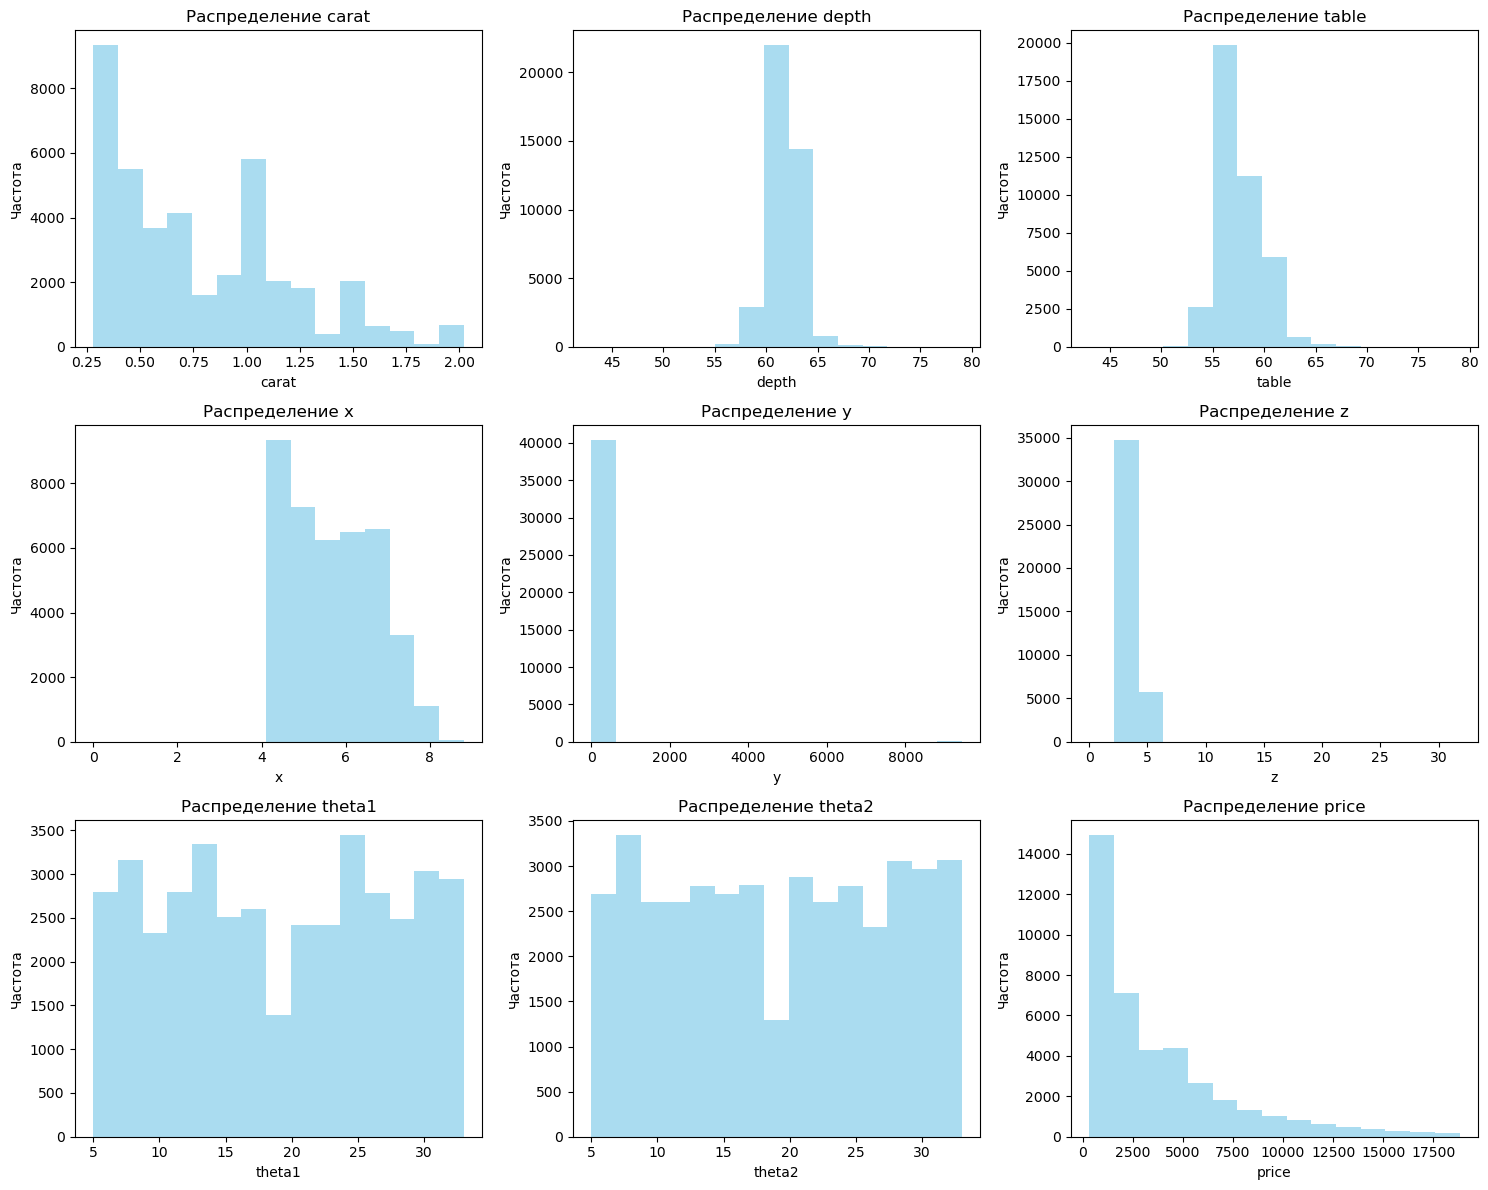

In [9]:
numeric_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'theta1', 'theta2', 'price']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if col in data_train.columns:
        axes[i].hist(data_train[col].dropna(), bins=15, alpha=0.7, color='skyblue')
        axes[i].set_title(f'Распределение {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

**Также проведем частотный анализ категориальных признаков**

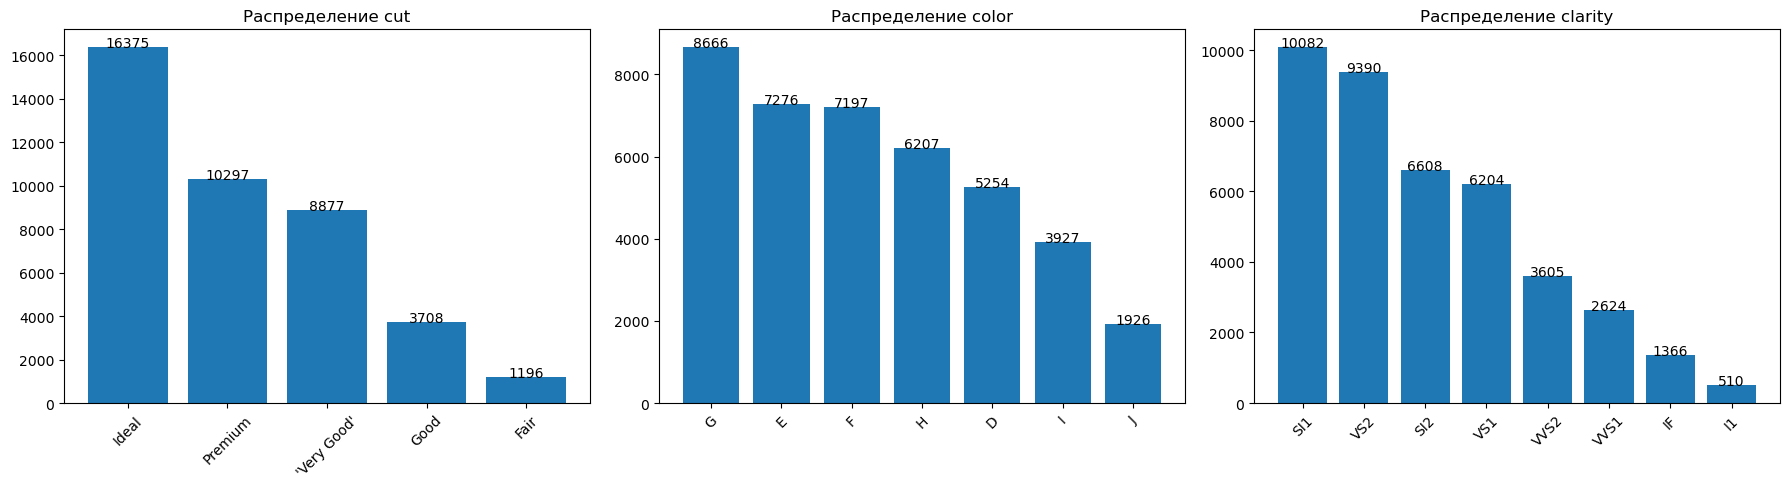

In [10]:
categorical_cols = ['cut', 'color', 'clarity']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_cols):
    value_counts = data_train[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'Распределение {col}')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Добавляем подписи с количествами
    for j, v in enumerate(value_counts.values):
        axes[i].text(j, v + 0.1, str(v), ha='center')

plt.tight_layout()
plt.show()

Cut: Преобладают Ideal и Premium     
Color: Преобладают G, E, F    
Clarity: Преобладают SI1, VS2    

**Проанализируем взаимосвязи между переменными**

Построим матрицу корреляций

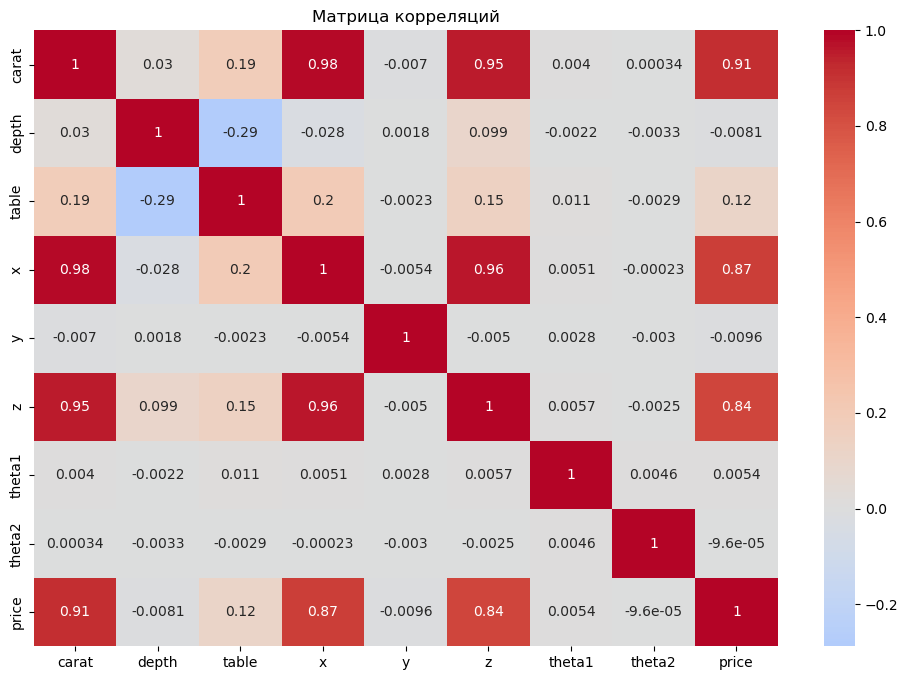

In [11]:
numeric_data_train = data_train.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data_train.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

Видим, что    
Сильная положительная корреляция между x, y, z    
theta1 и theta2 имеют слабые корреляции с другими переменными    

**Посмотрим на взаимосвязь цены с категориальными переменными**

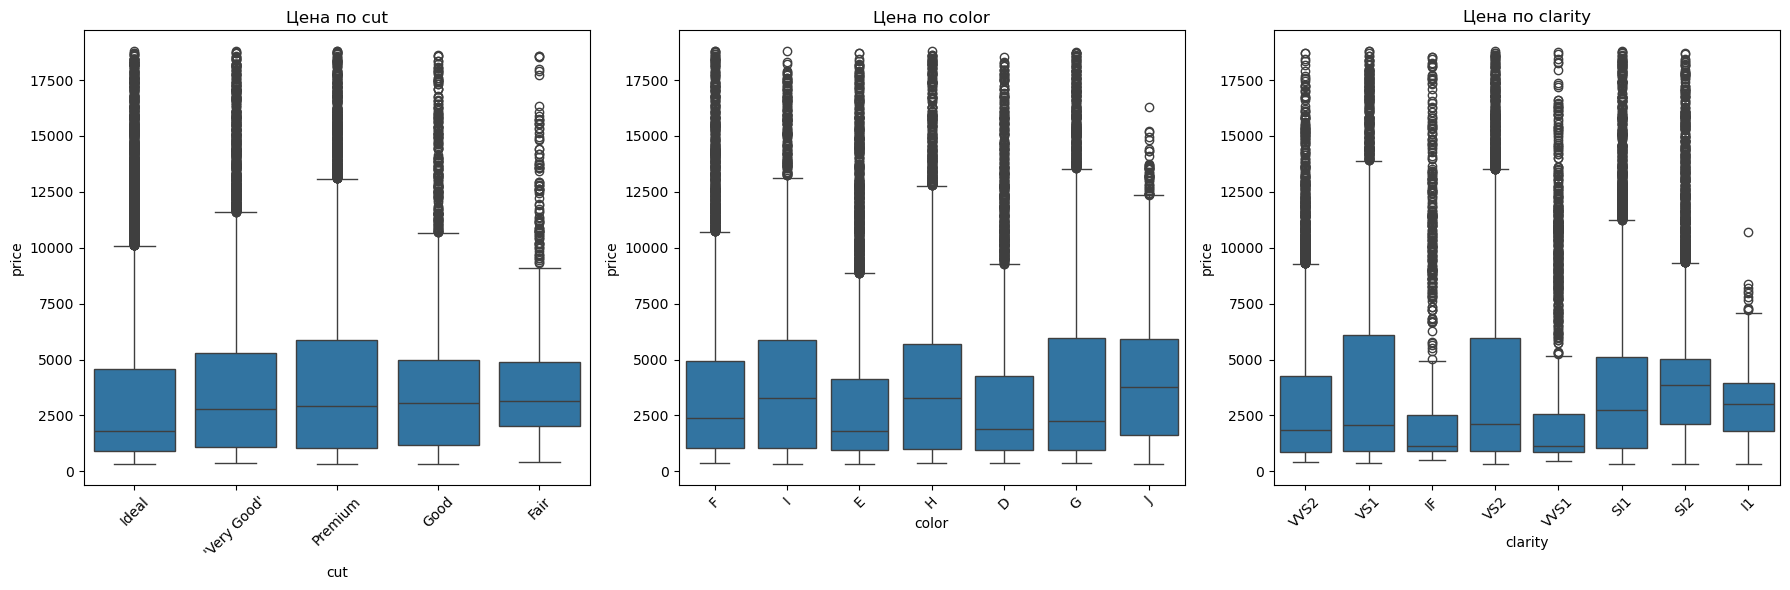

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=data_train, x=col, y='price', ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_title(f'Цена по {col}')

plt.tight_layout()
plt.show()

**Проанализируем цену по комбинациям cut и color**

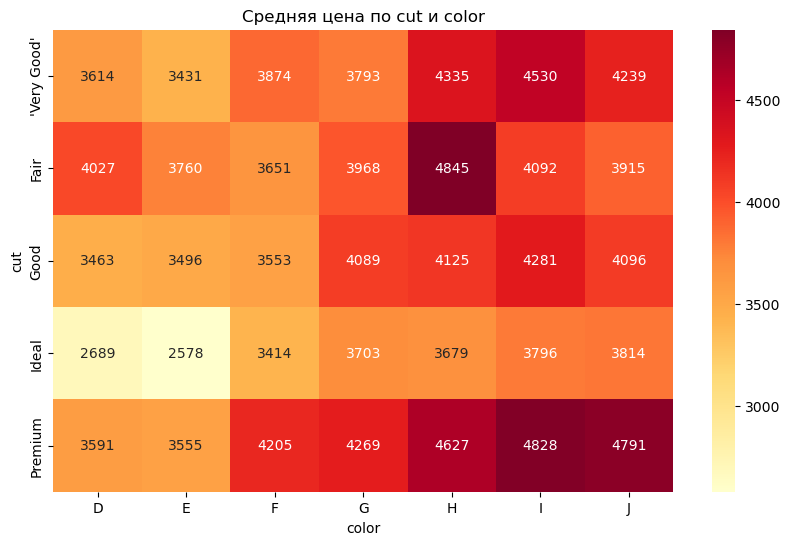

In [13]:
pivot_table = pd.pivot_table(data_train, values='price', index='cut', columns='color', 
                            aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Средняя цена по cut и color')
plt.show()

**Проанализируем цену по комбинациям clarity и color**

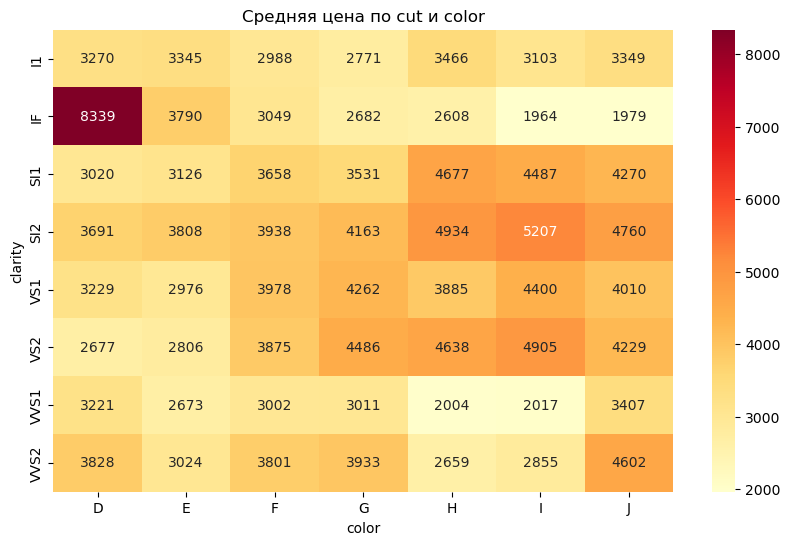

In [14]:
pivot_table = pd.pivot_table(data_train, values='price', index='clarity', columns='color', 
                            aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Средняя цена по cut и color')
plt.show()

**Проанализируем цену по комбинациям clarity и cut**

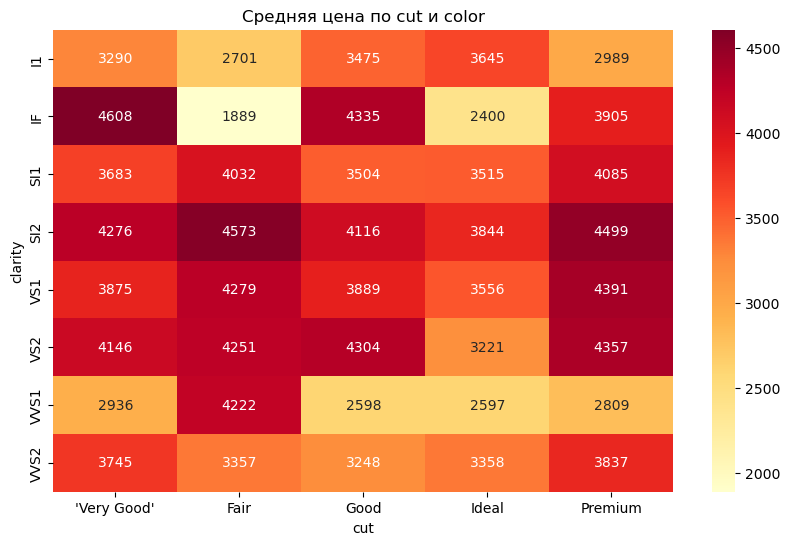

In [15]:
pivot_table = pd.pivot_table(data_train, values='price', index='clarity', columns='cut', 
                            aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Средняя цена по cut и color')
plt.show()

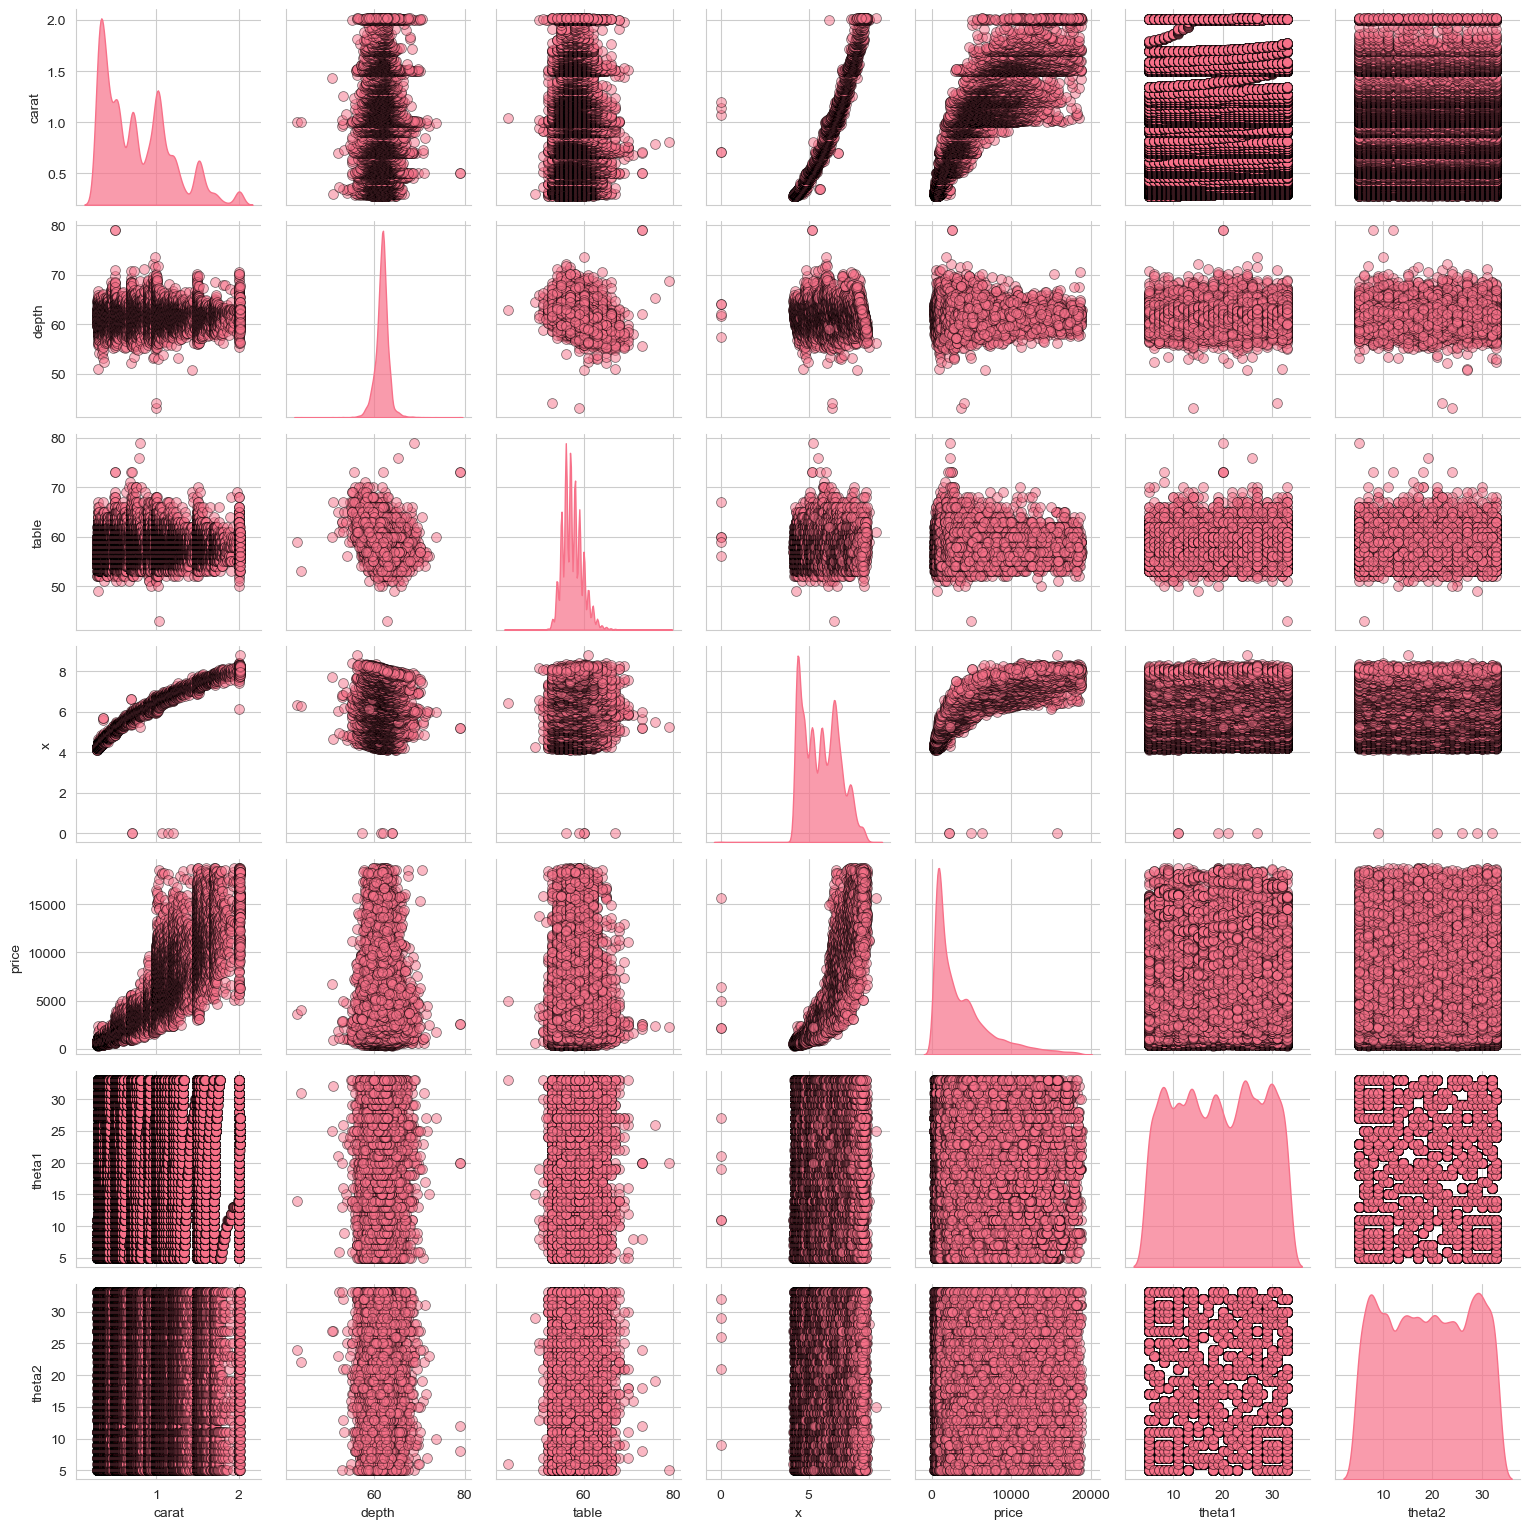

In [16]:
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 10)

pairplot = sns.pairplot(data_train[['carat', 'depth', 'table', 'x', 'price', 'theta1', 'theta2']], 

                        palette='viridis',
                        diag_kind='kde',
                        plot_kws={'alpha': 0.5, 's': 50, 'edgecolor': 'black'},
                        diag_kws={'fill': True, 'alpha': 0.7},
                        height=2.2)

plt.tight_layout()
plt.show()

В корреляционной матрице было видно, что theta1 и theta2 ни с чем не связаны     
На этапе pairplot oбнаружен QR код, координатами которого являются значения из  theta1 и theta2

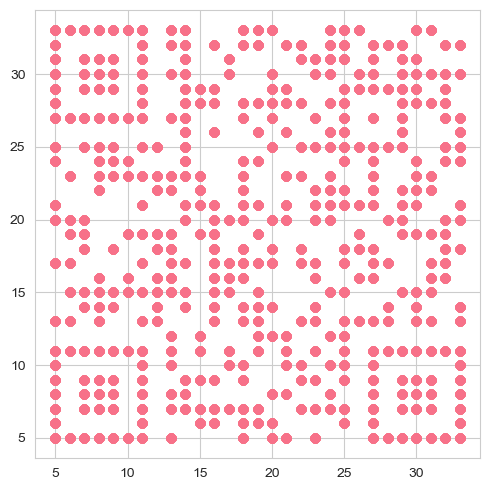

In [17]:
# Посмотрим на него поближе
plt.figure(figsize=(5, 5))
plt.scatter(data_train['theta1'], data_train['theta2'])
plt.tight_layout()
plt.show()

cut, color, clarity являются категориальными признаками      
carat, depth, table, x, y, x, theta1, theta2 - являются числовыми признаками

### Preprocessing (подготовка данных)

 В этом разделе вам необходимо реализовать подготовку ваших данных, в том числе заполнение пропусков, фильтрацию выбросов, кодирование категориальных признаков и т.д. В этот же раздел включите любые операции над данными, которые сочтете нужными.

**Первым делом удалим признаки theta1 и theta2**

In [18]:
data_train.drop(['theta1', 'theta2'], axis=1, inplace=True)
data_test.drop(['theta1', 'theta2'], axis=1, inplace=True)

**Далее заполним пропуски**

In [19]:
numeric_cols = ['depth', 'table', 'x', 'y', 'z', 'theta1', 'theta2', 'price']
categorical_cols = ['cut', 'color', 'clarity']

In [20]:
# Числовые - медианой
for col in numeric_cols:
    if col in data_train.columns and data_train[col].isnull().any():
        data_train[col].fillna(data_train[col].median(), inplace=True)
        data_test[col].fillna(data_test[col].median(), inplace=True)

In [21]:
# Категориальные - модой
for col in categorical_cols:
    if col in data_train.columns and data_train[col].isnull().any():
        data_train[col].fillna(data_train[col].mode()[0], inplace=True)
        data_test[col].fillna(data_test[col].mode()[0], inplace=True)

**Далее обработаем выбросы с помощью IQR метода**

In [22]:
def replace_outliers_iqr(df, columns):
    for col in columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
            df[col] = np.where(df[col] < lower, lower, df[col])
            df[col] = np.where(df[col] > upper, upper, df[col])
    return df

In [23]:
data_train = replace_outliers_iqr(data_train, numeric_cols)
data_test = replace_outliers_iqr(data_test, numeric_cols)

In [24]:
data_test.shape

(13487, 9)

**Выполним векторизацию категориальных признаков**

In [25]:
data_train = pd.get_dummies(data_train, columns=['cut', 'color', 'clarity'], prefix=['cut', 'color', 'clarity'])
data_test = pd.get_dummies(data_test, columns=['cut', 'color', 'clarity'], prefix=['cut', 'color', 'clarity'])

**Добавим новых признаков**

In [27]:
# 1. Геометрические признаки
data_train['volume'] = data_train['x'] * data_train['y'] * data_train['z']
data_train['density'] = data_train['carat'] / data_train['volume']
data_train['surface_area'] = 2 * (data_train['x']*data_train['y'] + data_train['x']*data_train['z'] + data_train['y']*data_train['z'])

data_test['volume'] = data_test['x'] * data_test['y'] * data_test['z']
data_test['density'] = data_test['carat'] / data_test['volume']
data_test['surface_area'] = 2 * (data_test['x']*data_test['y'] + data_test['x']*data_test['z'] + data_test['y']*data_test['z'])

In [28]:
# 2. Пропорции и симметрия
data_train['length_width_ratio'] = data_train['x'] / data_train['y']
data_train['depth_table_ratio'] = data_train['depth'] / data_train['table']
data_train['symmetry_score'] = (data_train['x'] / data_train['y']).abs() + (data_train['x'] / data_train['z']).abs()

data_test['length_width_ratio'] = data_test['x'] / data_test['y']
data_test['depth_table_ratio'] = data_test['depth'] / data_test['table']
data_test['symmetry_score'] = (data_test['x'] / data_test['y']).abs() + (data_test['x'] / data_test['z']).abs()

In [29]:
# 6. Полиномиальные признаки
data_train['carat_squared'] = data_train['carat'] ** 2
data_train['depth_squared'] = data_train['depth'] ** 2
data_train['volume_squared'] = data_train['volume'] ** 2
data_train['carat_cubed'] = data_train['carat'] ** 3

data_test['carat_cubed'] = data_test['carat'] ** 3
data_test['carat_squared'] = data_test['carat'] ** 2
data_test['depth_squared'] = data_test['depth'] ** 2
data_test['volume_squared'] = data_test['volume'] ** 2

In [30]:
# 7. Логарифмические преобразования
data_train['log_volume'] = np.log1p(data_train['volume'])
data_train['log_carat'] = np.log1p(data_train['carat'])

data_test['log_volume'] = np.log1p(data_test['volume'])
data_test['log_carat'] = np.log1p(data_test['carat'])

**Отделим целевую переменную**

In [31]:
X = data_train.drop('price', axis=1)
y = data_train['price']

**Поделим на train и test выборки**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**Нормализируем числовые признаки**

In [33]:
scaler = StandardScaler()
numeric_columns_to_scale = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'density', 'surface_area', 'length_width_ratio',
                           'depth_table_ratio', 'symmetry_score', 'carat_cubed', 'carat_squared',
                           'depth_squared', 'volume_squared', 'log_volume', 'log_carat']

X_train[numeric_columns_to_scale] = scaler.fit_transform(X_train[numeric_columns_to_scale])
X_test[numeric_columns_to_scale] = scaler.transform(X_test[numeric_columns_to_scale])
data_test[numeric_columns_to_scale] = scaler.transform(data_test[numeric_columns_to_scale])

**Удалим признаки с избыточной корреляцией**

In [34]:
# функция удаляет избыточные признаки рассматривая верхний треугольник матрицы корреляций
def remove_high_correlation(data, threshold=0.95):
    corr_matrix = data.corr(numeric_only=True).abs()
    upper_triangle = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(bool))
    
    correlated_features = []
    for feature in upper_triangle.columns:
        if (upper_triangle[feature] > threshold).any():
            correlated_features.append(feature)
    
    return correlated_features

In [37]:
# получим колонки, которые необходимо удалить из-за избыточности
drop_columns = remove_high_correlation(data_test)

In [38]:
# удалим drop_columns из всех датасетов
data_test = data_test.drop(drop_columns, axis=1)
X_train = X_train.drop(drop_columns, axis=1)
X_test = X_test.drop(drop_columns, axis=1)

### Model & training (Выбор модели и её обучение)

#### Эксперимент 1

**Линейная модель**

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_predict_lr = model.predict(X_test)

In [43]:
y_predict_test_lr = model.predict(data_test)

In [44]:
# сохраняем предсказание
data_predict = pd.DataFrame({
    'id': id,
    'price' : np.abs(y_predict_test_lr)
})

In [45]:
data_predict.to_csv('sample_submission.csv', index=False)

#### Эксперимент 2

**Lasso регрессия**

In [46]:
from sklearn.linear_model import Lasso

In [47]:
model_lasso = Lasso(alpha=1)

In [48]:
model_lasso.fit(X_train, y_train)

Lasso(alpha=1)

In [49]:
y_predict_lasso = model_lasso.predict(X_test)

In [50]:
y_predict_test_lasso = model_lasso.predict(data_test)

In [51]:
# сохраняем предсказание
data_predict = pd.DataFrame({
    'id': id,
    'price' : np.abs(y_predict_test_lasso)
})

In [52]:
data_predict.to_csv('sample_submission.csv', index=False)

#### Эксперимент 3

**Ridge регрессия**

In [53]:
from sklearn.linear_model import Ridge

In [54]:
model_ridge = Ridge(alpha=1)

In [55]:
model_ridge.fit(X_train, y_train)

Ridge(alpha=1)

In [56]:
y_predict_ridge = model_ridge.predict(X_test)

In [57]:
y_predict_test_ridge = model_ridge.predict(data_test)

In [58]:
# сохраняем предсказание
data_predict = pd.DataFrame({
    'id': id,
    'price' : np.abs(y_predict_test_ridge)
})

In [59]:
data_predict.to_csv('sample_submission.csv', index=False)

### Evaluation (оценка качества модели)

В этом разделе проводите оценку качества вашей итоговой модели. 

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [61]:
def evaluate_model(model, y, y_pred, model_name):
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    
    print(f"{model_name}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 40)
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [62]:
results = {}

results['LinearRegression'] = evaluate_model(model, y_test, y_predict_lr, "Linear Regression")
results['Lasso'] = evaluate_model(model_lasso, y_test, y_predict_lasso,"Lasso Regression")
results['Ridge'] = evaluate_model(model_ridge, y_test, y_predict_lasso, "Ridge Regression")

# Сравнение моделей
best_model = max(results, key=lambda x: results[x]['MAE'])
print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model} с MAE = {results[best_model]['MAE']:.4f}")

Linear Regression:
  MAE: 613.32
  MSE: 676143.57
  RMSE: 822.28
  R²: 0.9339
----------------------------------------
Lasso Regression:
  MAE: 610.64
  MSE: 676263.69
  RMSE: 822.35
  R²: 0.9338
----------------------------------------
Ridge Regression:
  MAE: 610.64
  MSE: 676263.69
  RMSE: 822.35
  R²: 0.9338
----------------------------------------
ЛУЧШАЯ МОДЕЛЬ: LinearRegression с MAE = 613.3156


### Conclusion (Выводы)

В рамках проекта были успешно реализованы процессы исследовательского анализа данных, препроцессинга и обучения моделей машинного обучения для предсказания стоимости алмазов. На основе датасета с характеристиками алмазов было обучено 3 линейные модели регрессии.
Лучший результат показали Lasso и Ridge Регрессии.

**Что не получилось**

Не все созданные признаки оказались полезными - часть была удалена из-за мультиколлинеарности
Также не удалось достичь лучшего MAE.